# K-Means++ vs. Coreset Trees

In [1]:
from layer_flow.data import DatasetFactory
from layer_flow.clustering import coreset_tree, kmpp, lloyd, compute_clustering_cost
from layer_flow.clustering.draw import plot_cluster_hulls

import matplotlib.pyplot as plt
import numpy as np
import time


def benchmark_algorithm(algorithm, dataset, ks):
    times = []
    costs = []
    for k in ks:
        start_time = time.time()
        centers = algorithm(dataset, k)
        end_time = time.time()
        cost = compute_clustering_cost(dataset, centers)
        print(f"K: {k}, Time: {end_time - start_time:.4f}s, Cost: {cost:.4f}")
        times.append(end_time - start_time)
        costs.append(cost)
    return times, costs

## Performance Comparison

In [2]:
seed = 1
ds = DatasetFactory.create("mnist")
X, y = ds.X, ds.y

ks = [10, 30, 50, 100]

### K-Means++

In [3]:
def algorithm_kmpp(X, k):
    return kmpp(X, k, seed=seed, verbose=True)


kmpp_times, kmpp_costs = benchmark_algorithm(algorithm_kmpp, X, ks)

100%|██████████| 9/9 [00:00<00:00, 14.30it/s]


K: 10, Time: 0.6314s, Cost: 4171184.2500


100%|██████████| 29/29 [00:02<00:00, 14.35it/s]


K: 30, Time: 2.0223s, Cost: 3514358.0000


100%|██████████| 49/49 [00:03<00:00, 14.48it/s]


K: 50, Time: 3.3847s, Cost: 3217575.0000


100%|██████████| 99/99 [00:06<00:00, 14.45it/s]


K: 100, Time: 6.8518s, Cost: 2864283.0000


### Coreset Trees

In [4]:
def algorithm_coreset_tree(X, k):
    return coreset_tree(X, k, seed=seed, verbose=True)


coreset_tree_times, coreset_tree_costs = benchmark_algorithm(
    algorithm_coreset_tree, X, ks
)

100%|██████████| 9/9 [00:00<00:00, 25.14it/s]


K: 10, Time: 0.4290s, Cost: 4197378.0000


100%|██████████| 29/29 [00:00<00:00, 57.15it/s]


K: 30, Time: 0.5777s, Cost: 3543231.5000


100%|██████████| 49/49 [00:00<00:00, 90.64it/s]


K: 50, Time: 0.6108s, Cost: 3221602.5000


100%|██████████| 99/99 [00:00<00:00, 154.14it/s]


K: 100, Time: 0.6983s, Cost: 2831849.0000


### Random Init + Lloyd's Algorithm

In [5]:
def algorithm_lloyd(X, k):
    # Select initial centers randomly
    init_idx = np.random.choice(X.shape[0], k, replace=False)
    initial_centers = X[init_idx]
    return lloyd(X, initial_centers, max_iter=3, verbose=True)


lloyd_times, lloyd_costs = benchmark_algorithm(algorithm_lloyd, X, ks)

Lloyd's Algorithm: 100%|██████████| 3/3 [00:01<00:00,  2.71it/s]


K: 10, Time: 1.1106s, Cost: 2426873.0000


Lloyd's Algorithm: 100%|██████████| 3/3 [00:02<00:00,  1.45it/s]


K: 30, Time: 2.0772s, Cost: 2044161.3750


Lloyd's Algorithm: 100%|██████████| 3/3 [00:03<00:00,  1.04s/it]


K: 50, Time: 3.1205s, Cost: 1911105.6250


Lloyd's Algorithm: 100%|██████████| 3/3 [00:05<00:00,  1.94s/it]


K: 100, Time: 5.8259s, Cost: 1724681.7500


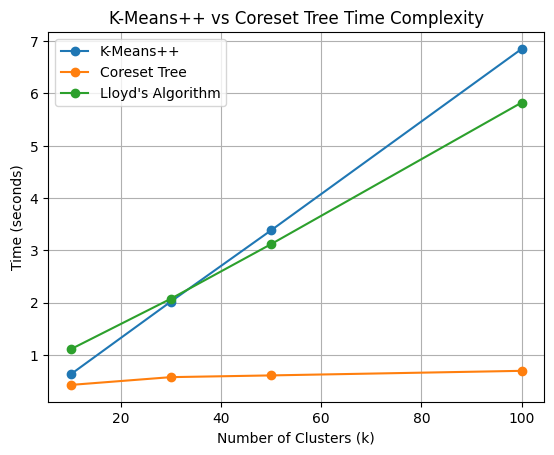

In [6]:
fig, ax = plt.subplots()
ax.plot(ks, kmpp_times, label="K-Means++", marker="o")
ax.plot(ks, coreset_tree_times, label="Coreset Tree", marker="o")
ax.plot(ks, lloyd_times, label="Lloyd's Algorithm", marker="o")
ax.set_xlabel("Number of Clusters (k)")
ax.set_ylabel("Time (seconds)")
ax.set_title("K-Means++ vs Coreset Tree Time Complexity")
ax.legend()
plt.grid()
plt.show()

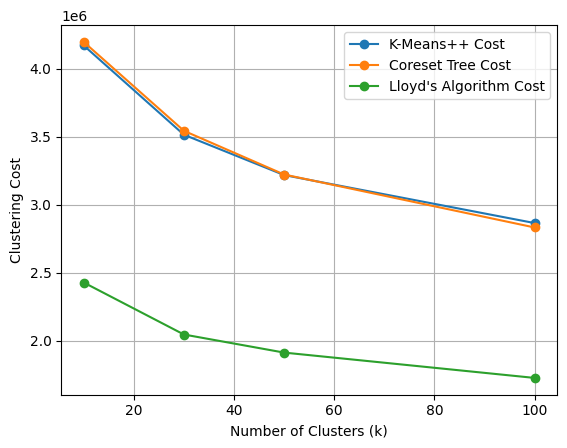

In [7]:
fig, ax2 = plt.subplots()
ax2.plot(ks, kmpp_costs, label="K-Means++ Cost", marker="o")
ax2.plot(ks, coreset_tree_costs, label="Coreset Tree Cost", marker="o")
ax2.plot(ks, lloyd_costs, label="Lloyd's Algorithm Cost", marker="o")
ax2.set_xlabel("Number of Clusters (k)")
ax2.set_ylabel("Clustering Cost")
ax2.legend()
plt.grid()

## Random Projections
This section will explore the performance of K-Means++ and Coreset Trees using random projections. The goal is to compare how well each method performs in terms of clustering quality and computational efficiency when applied to high-dimensional data.

In [8]:
def jl_projection(X):
    from sklearn.random_projection import (
        GaussianRandomProjection,
    )

    transformer = GaussianRandomProjection(n_components=250, random_state=42)
    return transformer.fit_transform(X)

In [9]:
X_jl = jl_projection(X)
print(f"JL projected shape: {X_jl.shape}")

JL projected shape: (60000, 250)


In [10]:
kmpp_times_jl, kmpp_costs_jl = benchmark_algorithm(algorithm_kmpp, X_jl, ks)

100%|██████████| 9/9 [00:00<00:00, 66.31it/s]


K: 10, Time: 0.1372s, Cost: 4314665.0000


100%|██████████| 29/29 [00:00<00:00, 72.93it/s]


K: 30, Time: 0.3986s, Cost: 3486974.0000


100%|██████████| 49/49 [00:00<00:00, 73.02it/s]


K: 50, Time: 0.6720s, Cost: 3195032.5000


100%|██████████| 99/99 [00:01<00:00, 73.63it/s]


K: 100, Time: 1.3455s, Cost: 2840446.7500


In [11]:
coreset_tree_times_jl, coreset_tree_costs_jl = benchmark_algorithm(
    algorithm_coreset_tree, X_jl, ks
)

  0%|          | 0/9 [00:00<?, ?it/s]

100%|██████████| 9/9 [00:00<00:00, 117.82it/s]


K: 10, Time: 0.0913s, Cost: 4187134.5000


100%|██████████| 29/29 [00:00<00:00, 281.94it/s]


K: 30, Time: 0.1173s, Cost: 3373282.0000


100%|██████████| 49/49 [00:00<00:00, 424.73it/s]


K: 50, Time: 0.1300s, Cost: 3059855.5000


100%|██████████| 99/99 [00:00<00:00, 711.94it/s]


K: 100, Time: 0.1538s, Cost: 2751839.0000


In [12]:
lloyd_times_jl, lloyd_costs_jl = benchmark_algorithm(algorithm_lloyd, X_jl, ks)

Lloyd's Algorithm: 100%|██████████| 3/3 [00:00<00:00,  4.69it/s]


K: 10, Time: 0.6409s, Cost: 2415571.2500


Lloyd's Algorithm: 100%|██████████| 3/3 [00:01<00:00,  2.66it/s]


K: 30, Time: 1.1286s, Cost: 2088219.0000


Lloyd's Algorithm: 100%|██████████| 3/3 [00:01<00:00,  2.16it/s]


K: 50, Time: 1.3879s, Cost: 1916083.5000


Lloyd's Algorithm: 100%|██████████| 3/3 [00:02<00:00,  1.26it/s]


K: 100, Time: 2.3849s, Cost: 1733684.8750


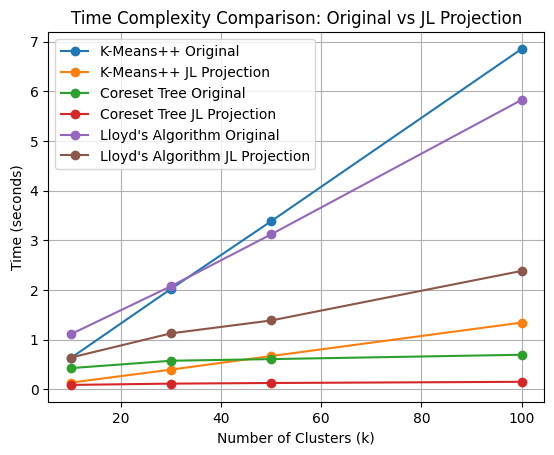

In [13]:
# Plotting the results for K-Means++ on original vs JL projected data
fig, ax = plt.subplots()
ax.plot(ks, kmpp_times, label="K-Means++ Original", marker="o")
ax.plot(ks, kmpp_times_jl, label="K-Means++ JL Projection", marker="o")
ax.plot(ks, coreset_tree_times, label="Coreset Tree Original", marker="o")
ax.plot(ks, coreset_tree_times_jl, label="Coreset Tree JL Projection", marker="o")
ax.plot(ks, lloyd_times, label="Lloyd's Algorithm Original", marker="o")
ax.plot(ks, lloyd_times_jl, label="Lloyd's Algorithm JL Projection", marker="o")
ax.set_title("Time Complexity Comparison: Original vs JL Projection")
ax.set_xlabel("Number of Clusters (k)")
ax.set_ylabel("Time (seconds)")
ax.legend()
plt.grid()

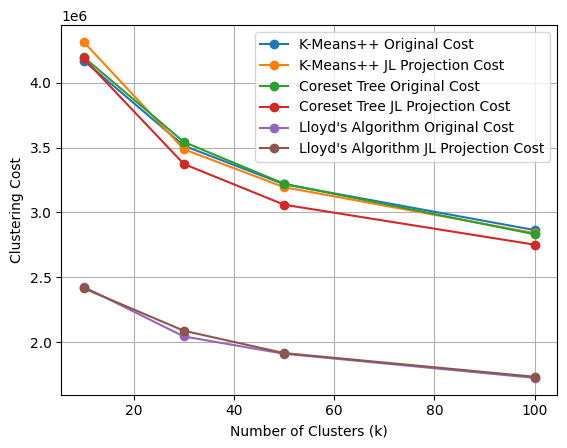

In [14]:
# Plotting the cost comparison
fig, ax2 = plt.subplots()
ax2.plot(ks, kmpp_costs, label="K-Means++ Original Cost", marker="o")
ax2.plot(ks, kmpp_costs_jl, label="K-Means++ JL Projection Cost", marker="o")
ax2.plot(ks, coreset_tree_costs, label="Coreset Tree Original Cost", marker="o")
ax2.plot(ks, coreset_tree_costs_jl, label="Coreset Tree JL Projection Cost", marker="o")
ax2.plot(ks, lloyd_costs, label="Lloyd's Algorithm Original Cost", marker="o")
ax2.plot(ks, lloyd_costs_jl, label="Lloyd's Algorithm JL Projection Cost", marker="o")
ax2.set_xlabel("Number of Clusters (k)")
ax2.set_ylabel("Clustering Cost")
ax2.legend()
plt.grid()

## Visualizations

/home/mseeliger/dev/layer-flow/.venv/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
Lloyd's Algorithm: 100%|██████████| 3/3 [00:00<00:00, 393.14it/s]

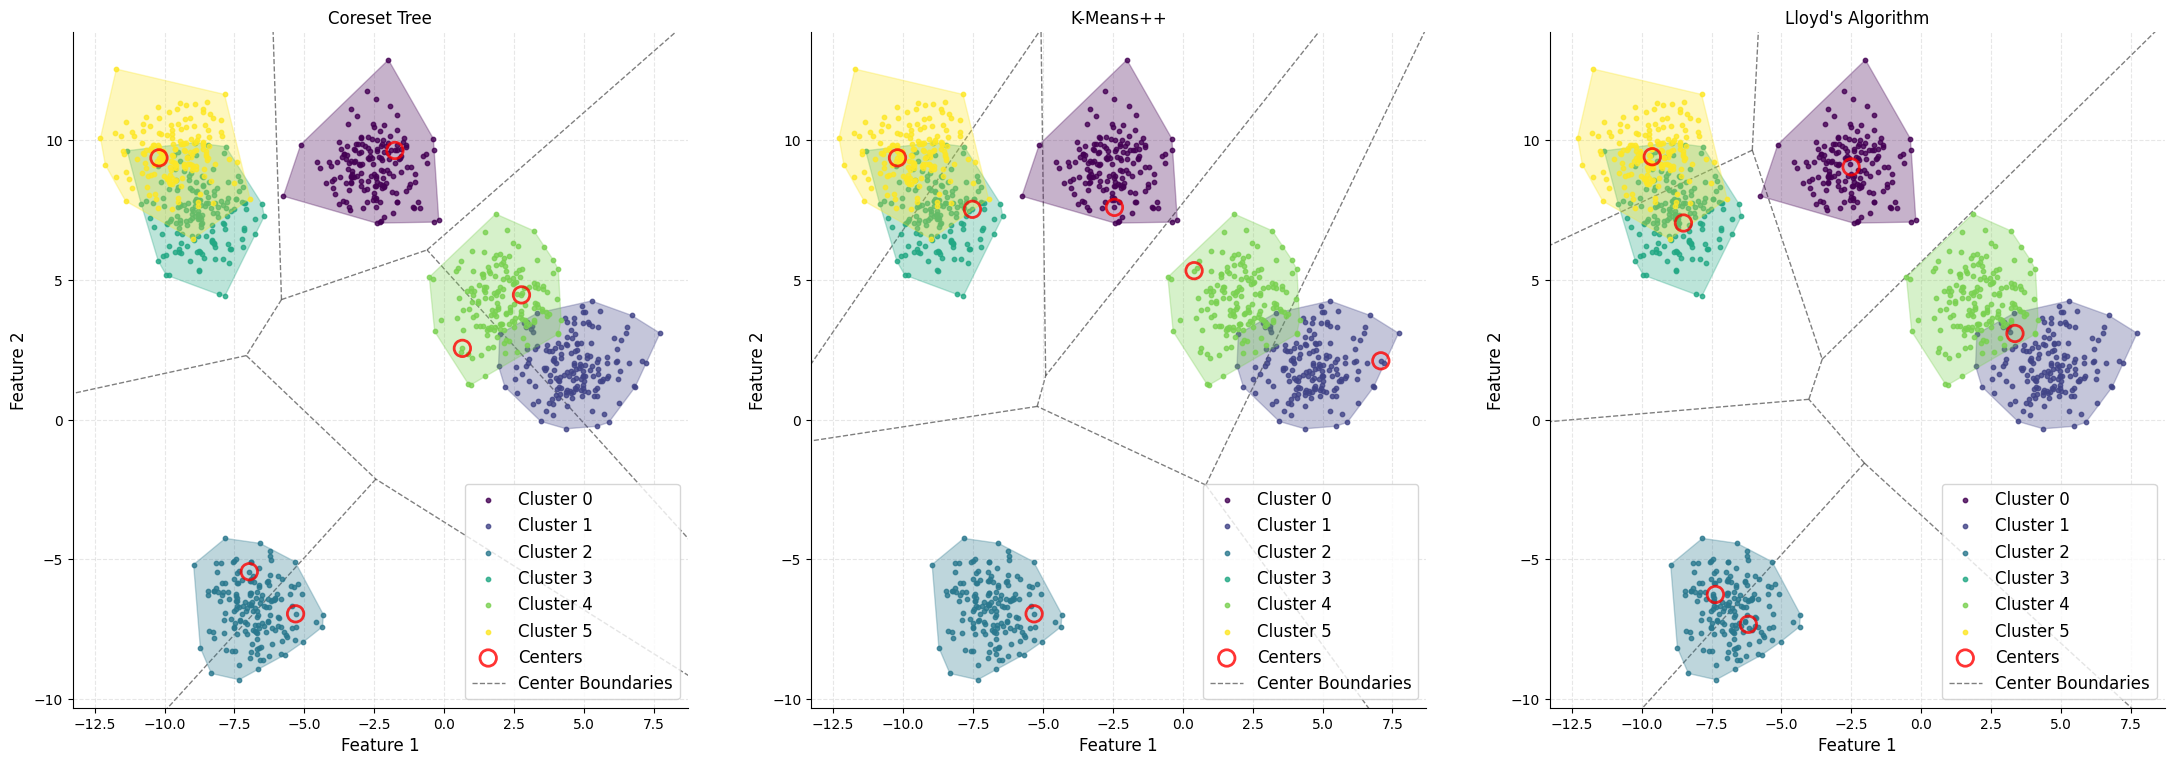

In [15]:
seed = 0
blobs = DatasetFactory.create("blobs", one_hot=False)
X, y = blobs.X, blobs.y

k = 6
centroids_coreset = coreset_tree(X, k, seed, verbose=True)
centroids_kmpp = kmpp(X, k, seed, verbose=True)
centroids_lloyd = algorithm_lloyd(X, k)


fig, ax = plt.subplots(1, 3, figsize=(27, 10))
ax[0].set_title("Coreset Tree")
ax[1].set_title("K-Means++")
ax[2].set_title("Lloyd's Algorithm")
plot_cluster_hulls(X, centroids_coreset, y, ax=ax[0])
plot_cluster_hulls(X, centroids_kmpp, y, ax=ax[1])
plot_cluster_hulls(X, centroids_lloyd, y, ax=ax[2])

plt.show()